In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

**# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.**

In [ ]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.shape

(1436, 11)

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1435.000000  1435.000000    1435.000000  1435.000000  1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986     0.055749   
std     3608.732978    18.563312   37491.094553    14.981408     0.229517   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63451.000000   110.000000     0.000000   
75%    11950.000000    70.000000   87041.500000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                 cc        Doors  Cylinders        Gears       Weight  
count   1435.000000  1435.000000     1435.0  1435.000000  1435.000000  
mean    1576.560976     4.032753        4.0     5.026481  1072.287108  
std      424.387533     0.952667        0.0     0.188575    52.251882

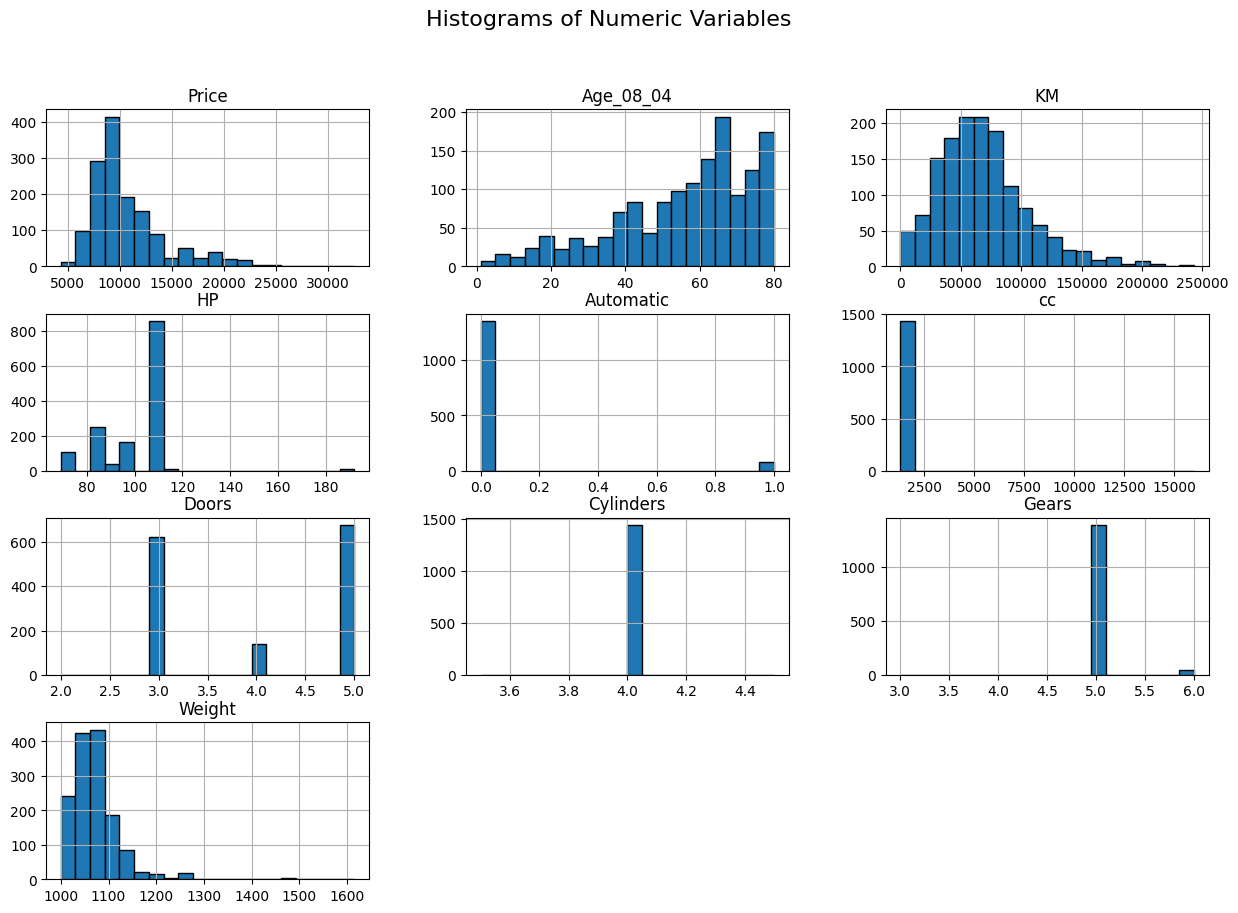

In [ ]:

# Histograms
df.hist(figsize=(15,10), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numeric Variables", fontsize=16)
plt.show()

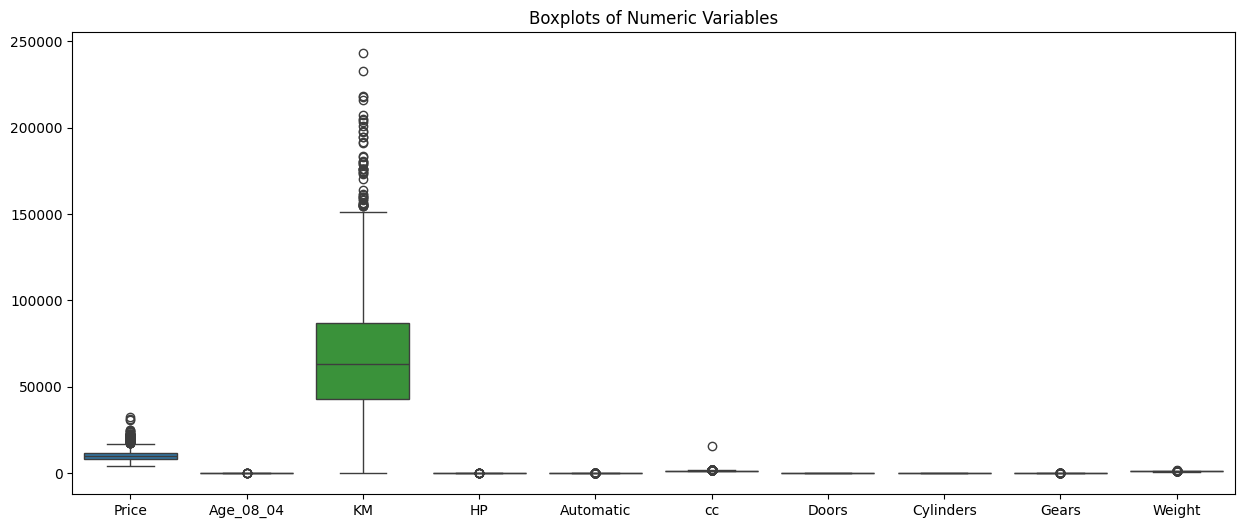

In [ ]:
# Boxplots
plt.figure(figsize=(15,6))
sns.boxplot(df)
plt.title("Boxplots of Numeric Variables")
plt.show()

In [ ]:
## outlier capping
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lower_extreme=q1-1.5*IQR
    upper_extreme=q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extreme if  x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']):
    outlier_capping(df,col)

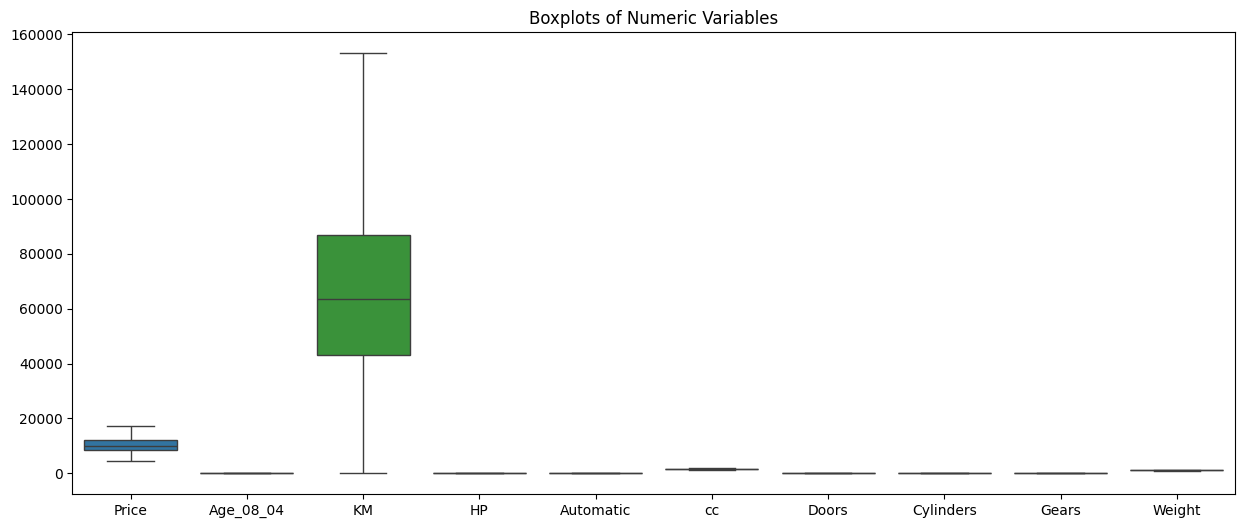

In [ ]:
# Boxplots
plt.figure(figsize=(15,6))
sns.boxplot(df)
plt.title("Boxplots of Numeric Variables")
plt.show()

In [ ]:
# Convert categorical columns (FuelType) using one-hot encoding
df= pd.get_dummies(df, drop_first=True)


In [ ]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3,4,5.0,1152.5,True,False
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3,4,5.0,1152.5,True,False
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3,4,5.0,1152.5,True,False
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3,4,5.0,1152.5,True,False
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3,4,5.0,1152.5,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,86.0,0.0,1300.0,3,4,5.0,1025.0,False,True
1431,10845.0,72.0,19000.0,86.0,0.0,1300.0,3,4,5.0,1015.0,False,True
1432,8500.0,71.0,17016.0,86.0,0.0,1300.0,3,4,5.0,1015.0,False,True
1433,7250.0,70.0,16916.0,86.0,0.0,1300.0,3,4,5.0,1015.0,False,True


In [ ]:
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1.009230,-1.781129,-0.595118,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,2.884126,-2.718789
1,1.093220,-1.781129,0.152463,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,2.884126,-2.718789
2,1.160412,-1.727143,-0.747078,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,2.884126,-2.718789
3,1.496370,-1.619171,-0.565908,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,2.884126,-2.718789
4,1.093220,-1.403226,-0.839578,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-1.006519,0.702234,-1.356844,-1.148522,0.0,-1.531016,-1.084443,0.0,0.0,-1.154108,-0.346726,0.367811
1431,0.117261,0.864192,-1.401323,-1.148522,0.0,-1.531016,-1.084443,0.0,0.0,-1.419293,-0.346726,0.367811
1432,-0.670561,0.810206,-1.458477,-1.148522,0.0,-1.531016,-1.084443,0.0,0.0,-1.419293,-0.346726,0.367811
1433,-1.090508,0.756220,-1.461357,-1.148522,0.0,-1.531016,-1.084443,0.0,0.0,-1.419293,-0.346726,0.367811


In [ ]:
Y1 = df['Price'] #separating the dependent and independent variables
Y2 = df['Price']
Y3 = df['Price']
x1 = df.drop(columns=['Price','Weight','Age_08_04'])
x2 = df.drop(columns=['Price','KM','Age_08_04'])
x3 = df.drop(columns=['Price','KM','Weight'])

**# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [ ]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x1,Y1,random_state=42,test_size=0.2) #Separating the dependent and independent variables as train,test data
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,Y2,random_state=42,test_size=0.2)
X3_train,X3_test,y3_train,y3_test = train_test_split(x3,Y3,random_state=42,test_size=0.2)

In [ ]:
print("Train Data :",X1_train.shape,y1_train.shape) #Finding the shape of train and test data
print("Test Data :",X1_test.shape,y1_test.shape)

Train Data : (1148, 9) (1148,)
Test Data : (287, 9) (287,)


**# 3.Build a multiple linear regression model using the training dataset.**

In [ ]:
model1 = LinearRegression() #Accessing the linear regression model
model2 = LinearRegression()
model3 = LinearRegression()

In [ ]:
model1.fit(X1_train,y1_train) #Training the models
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

LinearRegression()

In [ ]:
print(f"Intercept: {model1.intercept_}") #Finding the intercepts of model

Intercept: 10466.528594343457


In [ ]:
for i,j in enumerate(x1.columns):
    print(f"The coefficient for {j} is {model1.coef_[i]}") #Finding the coefficients of each column

The coefficient for KM is -0.057500724712822304
The coefficient for HP is 106.22613542727534
The coefficient for Automatic is 4.4231285301066237e-13
The coefficient for cc is -4.7026195084172
The coefficient for Doors is 353.53899542275633
The coefficient for Cylinders is 0.0
The coefficient for Gears is 0.0
The coefficient for Fuel_Type_Diesel is 5148.475710798625
The coefficient for Fuel_Type_Petrol is -1647.240020031769


In [ ]:
print(f"Intercept: {model2.intercept_}") #Finding the intercepts of model

Intercept: -61544.07134217103


In [ ]:
for i,j in enumerate(x2.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model2.coef_[i]}")

The coefficient for HP is 139.49839982004005
The coefficient for Automatic is -2.7000623958883807e-13
The coefficient for cc is -16.03396418599732
The coefficient for Doors is -467.11207365060284
The coefficient for Cylinders is 2.2737367544323206e-13
The coefficient for Gears is -9.094947017729282e-13
The coefficient for Weight is 75.77852625751163
The coefficient for Fuel_Type_Diesel is 7564.561601972862
The coefficient for Fuel_Type_Petrol is 3422.6733188016356


In [ ]:
print(f"Intercept: {model3.intercept_}") #Finding the intercepts of model

Intercept: 13781.413097004894


In [ ]:
for i,j in enumerate(x3.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model3.coef_[i]}")

The coefficient for Age_08_04 is -138.35652707732845
The coefficient for HP is 49.79623004819455
The coefficient for Automatic is 1.4210854715202004e-14
The coefficient for cc is -1.4567259160374633
The coefficient for Doors is 115.77689989114846
The coefficient for Cylinders is 0.0
The coefficient for Gears is 0.0
The coefficient for Fuel_Type_Diesel is 2061.4080141357285
The coefficient for Fuel_Type_Petrol is 1113.6085518108353


In [ ]:
Y1_pred = model1.predict(X1_test) #Predict the datapoints using the trained model with the help of test data
Y2_pred = model2.predict(X2_test)
Y3_pred = model3.predict(X3_test)

**# Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.**

**# Performance Metrics for Model1**

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y1_test, Y1_pred))
print('Mean Squared Error:',mean_squared_error(y1_test, Y1_pred))
print('R_Squared Error :',r2_score(y1_test, Y1_pred))

Mean Absolute Error: 1704.0080097868854
Mean Squared Error: 4439110.040114638
R_Squared Error : 0.47948214046702287


**# Performance Metrics for Model2**

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y2_test, Y2_pred))
print('Mean Squared Error:',mean_squared_error(y2_test, Y2_pred))
print('R_Squared Error :',r2_score(y2_test, Y2_pred))

Mean Absolute Error: 1712.3097185330957
Mean Squared Error: 4846632.685680385
R_Squared Error : 0.43169715355202853


**# Performance Metrics for Model3**

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y3_test, Y3_pred))
print('Mean Squared Error:',mean_squared_error(y3_test, Y3_pred))
print('R_Squared Error :',r2_score(y3_test, Y3_pred))

Mean Absolute Error: 967.802773191317
Mean Squared Error: 1520126.419327222
R_Squared Error : 0.8217541482735353


# Apply Lasso and Ridge methods.**

**# Ridge for Model1**

In [ ]:
ridge1 = Ridge(alpha=0.01)
ridge1.fit(X1_train,y1_train)
y_pred = ridge1.predict(X1_test)
print('R_Squared Error :',r2_score(y1_test, y_pred))

R_Squared Error : 0.47946052170950004


**# Ridge for Model2**

In [ ]:
ridge2 = Ridge(alpha=0.01)
ridge2.fit(X2_train,y2_train)
y_pred = ridge2.predict(X2_test)
print('R_Squared Error :',r2_score(y2_test, y_pred))

R_Squared Error : 0.4316426167244035


**# Ridge for Model3**

In [ ]:
ridge3 = Ridge(alpha=0.01)
ridge3.fit(X3_train,y3_train)
y_pred = ridge3.predict(X3_test)
print('R_Squared Error :',r2_score(y3_test, y_pred))

R_Squared Error : 0.8217492036727251


**# Lasso for Model1**

In [ ]:
lasso1 = Lasso(alpha=0.01)
lasso1.fit(X1_train,y1_train)
y_pred = lasso1.predict(X1_test)
print('R_Squared Error :',r2_score(y1_test, y_pred))

R_Squared Error : 0.47947877989573984


**# Lasso for Model2**

In [ ]:
lasso2 = Lasso(alpha=0.01)
lasso2.fit(X2_train,y2_train)
y_pred = lasso2.predict(X2_test)
print('R_Squared Error :',r2_score(y2_test, y_pred))

R_Squared Error : 0.43168987744864606


**# Lasso for Model3**

In [ ]:
lasso3 = Lasso(alpha=0.01)
lasso3.fit(X3_train,y3_train)
y_pred = lasso3.predict(X3_test)
print('R_Squared Error :',r2_score(y3_test, y_pred))

R_Squared Error : 0.8217502041219038


# Conclusion

# Interview Questions:

**1.What is Normalization & Standardization and how is it helpful?**

Normalization and Standardization are techniques used to scale numerical data so that all features contribute equally to a model’s performance.

Normalization means adjusting the data to a fixed range, usually between 0 and 1. It is useful when the features have different units or scales.

Standardization means rescaling data so that it has a mean of 0 and a standard deviation of 1.

It helps models like Logistic Regression or SVM perform better and converge faster.

**2.What techniques can be used to address multicollinearity in multiple linear regression?**

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it hard to determine their individual effects.

**Remove highly correlated variables – Drop one of the variables that show strong correlation with others.

**Combine variables – Create a single feature (e.g., through averaging or principal component analysis).

**Use Regularization – Apply Ridge Regression or Lasso Regression, which penalize large coefficients and reduce multicollinearity.

**Variance Inflation Factor (VIF) – Identify and remove variables with high VIF values.